<p><h1><font face="arial", size="6"><i>Introduction</i></font></h1></p>
<p><font size="3.5", face="arial">Credit card fraud is a wide-ranging term for theft and fraud committed using or involving a payment card, such as a credit card or debit card, as a fraudulent source of funds in a transaction. The purpose may be to obtain goods without paying, or to obtain unauthorized funds from an account.</font></p>
<p><font size="3.5", face="arial">Although incidence of credit card fraud is limited to about 0.1% of all card transactions, this has resulted in huge financial losses as the fraudulent transactions have been large value transactions. Also, 0.04% (4 out of every 10,000) of all monthly active accounts were fraudulent. Even with tremendous volume and value increase in credit card transactions, these proportions have stayed the same or have decreased due to sophisticated fraud detection and prevention systems. Today's fraud detection systems are designed to prevent one twelfth of one percent of all transactions processed, which still translates into billions of dollars in losses.</font></p>
<p><font size="3.5", face="arial">An effective fraud detection system can make huge impact and potentially prevent the card holder from suffering unnecessary losses. Our goal is to study machine learning techniques and apply a subset of those techniques to detect fraudulent transactions. Throughout the project, we have studied and employed logistic regression, SVM (support vector machine), random forest, and ensemble. For each method, we have tried different parameters and compared the corresponding results to select the best combination of parameters. In particular, though, ensemble itself is not a machine learning method, but rather it refers to combine multiple models and produce predictions according to the majority results given by the models. Ensemble is a good way to reduce variance, average out biases and is less likely to overfit.</font></p>
<p><h1><font face="arial", size="6"><i>Overview: Dataset and Modeling</i></font></h1></p>
<p><font size="3.5", face="arial">The dataset is adapted from a Kaggle competition. This dataset consists of 28 independent variables resulting from a PCA transformation, plus another two independent variables: time and amount. Most of the variables are numeric, of which names are unknown out of confidential consideration. Each row of this dataset is a transaction. The response variable is class taking numeric value 0 or 1. 0 means this transaction is labeled as normal, while 1 means this transaction is labeled as fraudulent. There are 284,807 transactions in the dataset, and 492 are frauds, which accounts for only 0.172% of all transactions. It should be noticed that this dataset is extremely imbalanced, and thus certain resampling schemes are to be considered to deal with the skewness.</font></p>
<p><font size="3.5", face="arial">We split the project into two parts: exploratory data analysis (EDA) and modeling. In EDA, we mainly explore the dataset to get a preliminary understanding of the dataset, which serves as a guideline for the subsequent resampling and modeling. Specifically, we will check the existence of missing values, obtain summary statistics of the dataset, plot the distributions of a subset of independent variables</font></p>

<h1><font size="6"><i><strong>Exploratory Data Analysis</strong></i></font></h1>

In [3]:
# Display first 5 samples of the dataset.
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Display summary statistics of the dataset.
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print "The summary statistics of normal transactions:"
data.Amount[data.Class == 0].describe()

The summary statistics of normal transactions:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [6]:
print "The summary statistics of fraudulent transactions:"
data.Amount[data.Class == 1].describe()

The summary statistics of fraudulent transactions:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
# Check the existence of missing values.
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<font size="3.5", face="arial">There are no missing values among explanatory variables in this dataset.</font>

(0, 350000)

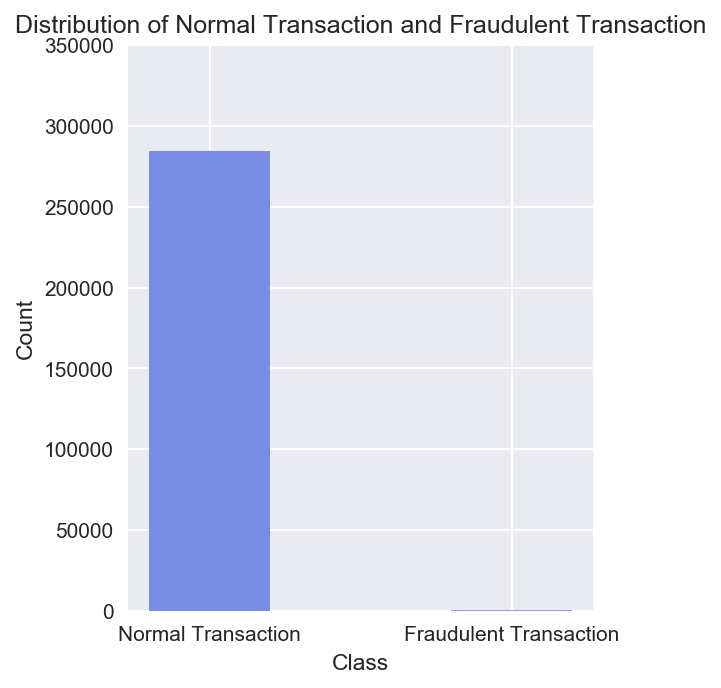

In [4]:
# Visualize the count for normal transactions and fraudulent transactions.

plt.figure(figsize = (4, 5), dpi = 150)
rects = plt.bar(np.array([0, 1]), np.array(Counter(data["Class"]).values()), 
                color = sns.light_palette((260, 75, 60), input = "husl", reverse = True), width = 0.4)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Normal Transaction and Fraudulent Transaction", fontsize = 12)
plt.xticks(np.array([0, 1]), ["Normal Transaction", "Fraudulent Transaction"])
plt.ylim([0, 350000])

<font size="3.5">There are 284807 transactions in the dataset. Among all transactions, there are 284315 normal transactions, but there are only 492 fraudulent transactions. Normal transactions account for 99.83% of total transactions, while fraudulent transactions account for 0.1727% of total transactions. This dataset is extremely imbalanced. Given this situation, a resampling scheme (undersampling or oversampling, or a combination of both) is to be performed before statistical analysis.</font>

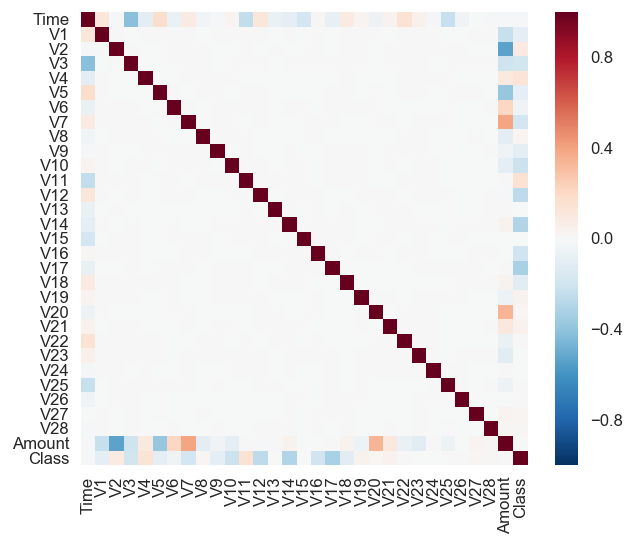

In [5]:
# Plot a heatmap to display the correlation between variables.

plt.figure(figsize = (6, 5), dpi = 120)
sns.heatmap(data.corr(method = "pearson"))

<font size="3.5", face="arial">The diagonal entries represent the correlation against the variable itself. We can observe from off-diagonal entries that variables are pretty uncorrelated. This is bacause variables V1-V28 are obtained from PCA transformation.</font>

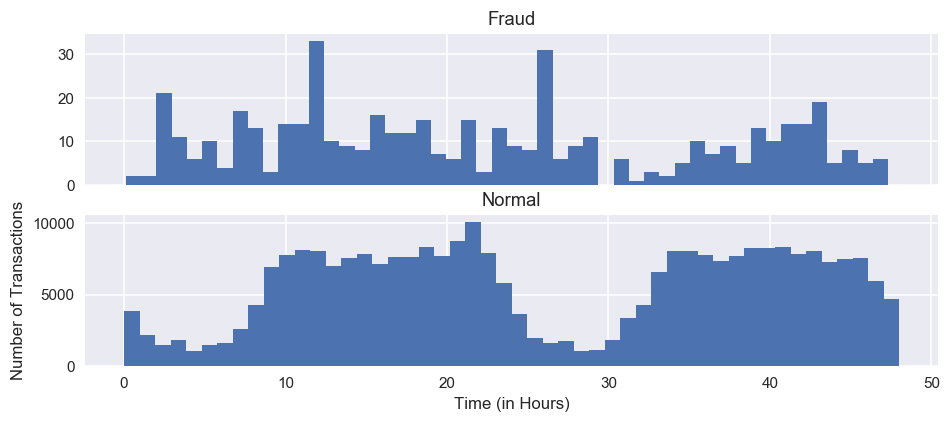

In [6]:
# Plot the number of transactions against time. 

f, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (10, 4), dpi = 110)

bins = 50

ax1.hist(data.Time[data.Class == 1] / 3600, bins = bins)
ax1.set_title("Fraud")

ax2.hist(data.Time[data.Class == 0] / 3600, bins = bins)
ax2.set_title("Normal")

plt.xlabel("Time (in Hours)")
plt.ylabel("Number of Transactions")

<font size="3.5", face="arial">It seems that there is no apparent pattern between fraudulent transactions and time, but there seems to be a cyclical pattern between normal transactions and time.</font>

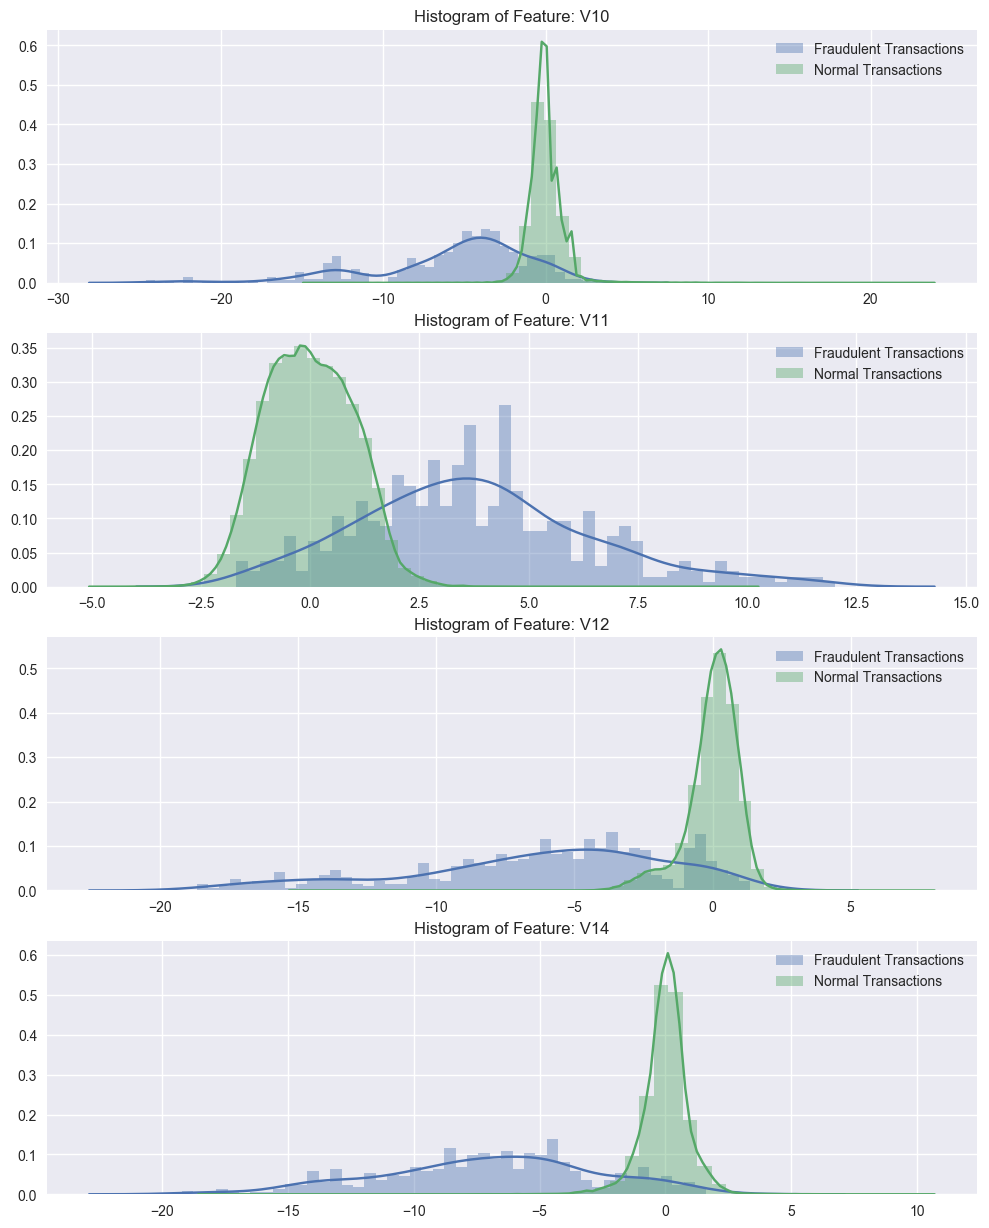

In [7]:
# Plot the distribution of variables for normal transactions and fraudulent transactions, respectively.

v_features = data.iloc[:, [10, 11, 12, 14]].columns

plt.figure(figsize = (12, 28*4), dpi = 100)
gs = gridspec.GridSpec(28, 1)
for i, feature in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[feature][data.Class == 1], bins = 50, label = "Fraudulent Transactions")
    sns.distplot(data[feature][data.Class == 0], bins = 50, label = "Normal Transactions")
    ax.set_xlabel("")
    ax.set_title("Histogram of Feature: "+str(feature))
    plt.legend()

<font size="3.5", face="arial">We plotted distributions of variables V10, V11, V12, and V14. Previously we plotted distributions for variables V1-V28, but we observe that some variables, such as V13, V15, and V19, show high similarities in distributions for normal transactions and fraudulent transactions. We suspect these variables will not become good predictors for the classification task. Variables such as V10, V11, V12, and V14, show high differences in distributions for two types of transactions. We suspect these variables showing high differences will be good predictiors for classification task.</font>

# Sample

As we mentioned earlier, the dataset is exactly unbalanced. Generally, dealing with imbalanced datasets entails strategies such as improving classification algorithms or balancing classes in the training data (data preprocessing) before providing the data as input to the machine learning algorithm.

The main objective of balancing classes is to either increasing the frequency of the minority class or decreasing the frequency of the majority class. This is done in order to obtain approximately the same number of instances for both the classes. In this project, we would apply the **random under-sampling technique** and split the data into 70% training dataset and 30% testing dataset. We would use random under-sampling on training set and test on original testing dataset.

<br>
**Random Under-Sampling**:

Random Undersampling aims to balance class distribution by randomly eliminating majority class examples.  This is done until the majority and minority class instances are balanced out.


* Advantages:
    * It can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.
    

* Disadvantages:
   * It can discard potentially useful information which could be important for building rule classifiers.
   * The sample chosen by random under sampling may be a biased sample. And it will not be an accurate representative of the population. Thereby, resulting in inaccurate results with the actual test data set.

# Modeling

### Concepts

In this project, we would use supervised machine learning techniques for classiﬁcation because we want to predict whether the traanscation is normal or fraud.

### Model Selection

We prefer to build three models to detect the fraud transction:
   * Logistic Regressionm
   * SVM
   * Random Forest

### Show results

In each algorithm, we will show the confusion matrix to visualize the performance of an algorithm and relative reports for **true positive rate** and **true negative rate**.

* True positive rate: the percentage of fraud transaction which are correctly identified given the true label.
* True negative rate: the percentage of normal transaction which are correctly identified given the true label.

The reason of reporting these rates is that: our goal is to detect the fraud transaction as more as poissble. In some cases, even though the overall accuracy is very high, the true positive rate might be really low due to the high true negative rate. Thus, we would consider this situation and try to improve the true positive rate for each algorithm.

## Logistic Classification

We would apply 30 features to fit the logistic classification model. It works by extracting some set of weighted features from the input, taking logs, and combining them linearly (meaning that each feature is multiplied by a weight and then added up).

Then we start to tune the parameters for logistic classification model by using GridSearchCV in Scikit-learn library to ﬁnd the best parameters. The main parameters to tune are C, penalty and the class_weight. The C is inverse of regularization strength which is parameter of the penalty. For penalty, as we talk earier, the settings of the penalty here are L1 and L2. Also, we adjust the class weight for the fake to penalize the error for identifying fake account. Moreover, we conduct 5-Folds cross-validator in GridSearchCV. It Split dataset into 5 consecutive folds (without shuffling by default). Each fold is then used once as a validation while the 4 remaining folds form the training set.

After getting the new parameters and fitting the new model, we gain the accuracy of overall detection which is around 95%. Moreover, the the ratio of predicting fake account correctly is about the 92.52%.

In [7]:
# Use the function tuningLogitRegression to obtain the best parameters. 
un_log = tuningLogitRegression(X_untrain, y_untrain, LogisticRegression(), 4)

The best parameters are {'penalty': 'l1', 'C': 0.10000000000000001, 'class_weight': {1: 2}} with a score of 0.91


Confusion matrix, without normalization

------------------------------------Classification Report------------------------------------
True positive rate is 0.925170068027
True negative rate is 0.948625961358


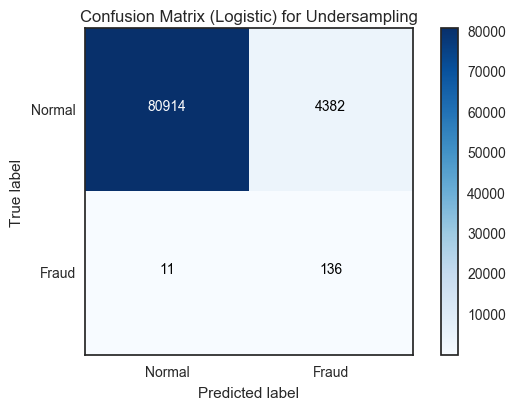

In [8]:
un_log_pred = un_log.predict(X_test)
classification_report(y_test, un_log_pred, set_title = 'Confusion Matrix (Logistic) for Undersampling')

In [9]:
print("The accuracy for using best parameters in logistic regression by under-sampling is {}."
      .format(accuracy_score(y_test.ravel(), un_log_pred)))

The accuracy for using best parameters in logistic regression by under-sampling is 0.948585606779.


## SVM

Support Vector Machines (SVMs) use a different loss function from LR. They are also interpreted differently (maximum-margin). The main reason to use an SVM instead of a Logistic Regression is because the problem might not be linearly separable. In that case, we will have to use an SVM with a non linear kernel (e.g. RBF). Unfortunately, the major downside of SVMs is that they can be painfully inefficient to train. 



At beginning of building model of SVC, let's try different kernels in SVC to calculate the overall accuracy. By observing the results below, we can obviously see that the accuracy of applying rbf kernel (99.76%) is greater than the accuracy of using linear kernel (97%). However, the true positive rate of rbf kernl is only 2.7%, which points a extreme low accuracy of detecting fraud transaction. Also, we find that we could apply LinearSVC (similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm) instead of using linear kernel for classification. This is because the LinearSVC would efficiently calculate the accuracy of the testing set and return the similar accuracy when compared with linear kernel in SVC.


### 'rbf' kernel

In [48]:
SVM_rbf = SVC(C = 1.0, kernel = 'rbf', gamma = 'auto', random_state = 0)
predict_rbf = SVM_rbf.fit(X_untrain, y_untrain).predict(X_test)
rbf_acc = accuracy_score(y_test.ravel(), predict_rbf)
print 'After fitting the SVM with rbf kernel by default parameters, the accuracy is {}'.format(rbf_acc)

After fitting the SVM with rbf kernel by default parameters, the accuracy is 0.997670961928


### 'linear' kernel

In [49]:
SVM_lin = SVC(C = 1.0, kernel = 'linear', gamma = 'auto', random_state = 0)
predict_lin = SVM_lin.fit(X_untrain, y_untrain).predict(X_test)
lin_acc = accuracy_score(y_test.ravel(), predict_lin)
print 'After fitting the SVM with linear kernel by default parameters, the accuracy is {}'.format(lin_acc)

After fitting the SVM with linear kernel by default parameters, the accuracy is 0.970038505202


### LinearSVC

In [50]:
linsvc = LinearSVC(C = 1.0 ,dual=False, random_state = 0)
predict_test = linsvc.fit(X_untrain, y_untrain).predict(X_test)
linsvc_acc = accuracy_score(y_test.ravel(), predict_test)
print 'After fitting the LinearSVC by default parameters, the accuracy is {}'.format(linsvc_acc)

After fitting the LinearSVC by default parameters, the accuracy is 0.975387100172


### After tuning parameters for Models

Here, we still apply the GridSearchCV and Kfold validation for SVC. For rbf kernel, we try to adjust C (penalty parameter of the error term) and gamma (kernel coefficient for ‘rbf’). For LinearSVC, the tuning parameters are C (penalty parameter of the error term), the penalty (l2 or l1) and class_weight (penalize the error for identifying fake account). 

As observing both accuracies and confusion matrixes, the accuracy of rbf kernel (94.07%) in SVC is similar with the accuracy of LinearSVC (93.48%). But the true positive rate of LinearSVC (93.20%) is mainly greater than the true postive rate of rbf kernel in SVC (26.53%). Therefore, we would like to use LinearSVC to predict the labels due to higher true positive rate.

### Best parameters for rbf

In [54]:
# fit the models with best parameters
svc_rbf = SVC(kernel='rbf')
rbf_fit = tuning_params_rbf(X_untrain, y_untrain, svc_rbf)

The best parameters are {'C': 10.0, 'gamma': 0.001} with a score of 0.20


Confusion matrix, without normalization

------------------------------------Classification Report------------------------------------
True positive rate is 0.265306122449
True negative rate is 0.941861283061


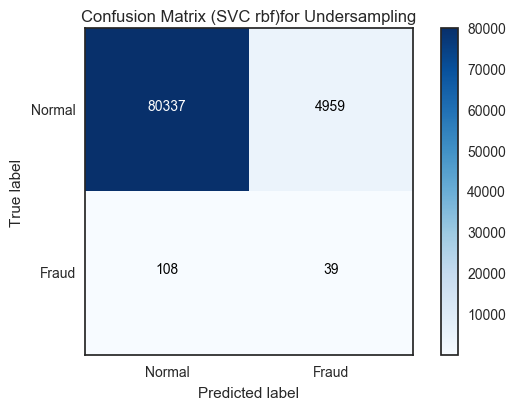

In [55]:
un_rbf_pred = rbf_fit.predict(X_test)
classification_report(y_test, un_rbf_pred, set_title = 'Confusion Matrix (SVC rbf)for Undersampling')

In [56]:
print 'After tuning parameters, the accuracy of SVC with rbf kernel is {}'.format(accuracy_score(y_test, un_rbf_pred))

After tuning parameters, the accuracy of SVC with rbf kernel is 0.940697306977


### Best parameters for LinearSVC

In [12]:
linsvc = LinearSVC(dual = False)
lin_fit = tuning_params_linsvc(X_untrain, y_untrain, linsvc)

The best parameters are {'penalty': 'l1', 'C': 0.10000000000000001, 'class_weight': {1: 3}} with a score of 0.90


Confusion matrix, without normalization

------------------------------------Classification Report------------------------------------
True positive rate is 0.931972789116
True negative rate is 0.934744888389


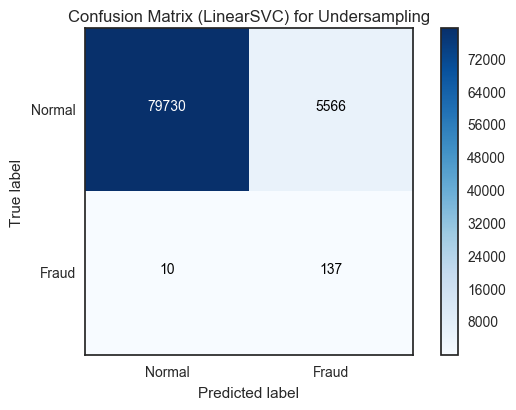

In [13]:
un_linsvc_pred = lin_fit.predict(X_test)
classification_report(y_test, un_linsvc_pred, set_title = 'Confusion Matrix (LinearSVC) for Undersampling')

In [14]:
print 'After tuning parameters, the accuracy of LinearSVC is {}'.format(accuracy_score(y_test, un_linsvc_pred))

After tuning parameters, the accuracy of LinearSVC is 0.934740119144


## Random Forest

Random forest is an ensemble tool which takes a subset of observations and a subset of variables to build a decision trees. It builds multiple such decision tree and amalgamate them together to get a more accurate and stable prediction.

We still use 5-fold cross-validation in tunning parameters, but apply RandomizedSearchCV instead of GridSearchCV due to hgiher efficiency for tuning parameters. We would adjust following parameters: n_estimators (the number of trees in the forest), criterion (gini and entropy), max_features(sqrt and log2), max_depth (the maximum depth of the tree) and min_samples_leaf (The minimum number of samples required to be at a leaf node), which would improve the performance of the random forest model. Lastly, we also set the class weight in the model to improve the true positive rate (the probability of predicting fraud given the true label is fraud transacation). 

The overall accuracy of detecting all transaction in testing set is 99.26%. But the true positive rate is only 87.07% by using random forest.

In [27]:
rf_param = tuningRandomForest(X_untrain, y_untrain, RandomForestClassifier({1:3}), 9)

The best parameters are {'n_estimators': 31, 'max_features': 'log2', 'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1} with a score of 0.92


Confusion matrix, without normalization

------------------------------------Classification Report------------------------------------
True positive rate is 0.877551020408
True negative rate is 0.992637403864


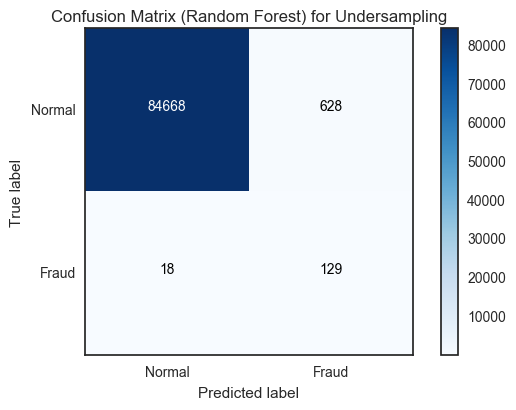

In [28]:
un_rf_pred = rf_param.fit(X_untrain, y_untrain).predict(X_test)
classification_report(y_test, un_rf_pred, set_title = 'Confusion Matrix (Random Forest) for Undersampling')

In [29]:
print 'After tuning parameters, the accuracy of Random Forest is {}'.format(accuracy_score(y_test, un_rf_pred))

After tuning parameters, the accuracy of Random Forest is 0.992439404047


### Plot the importances of features

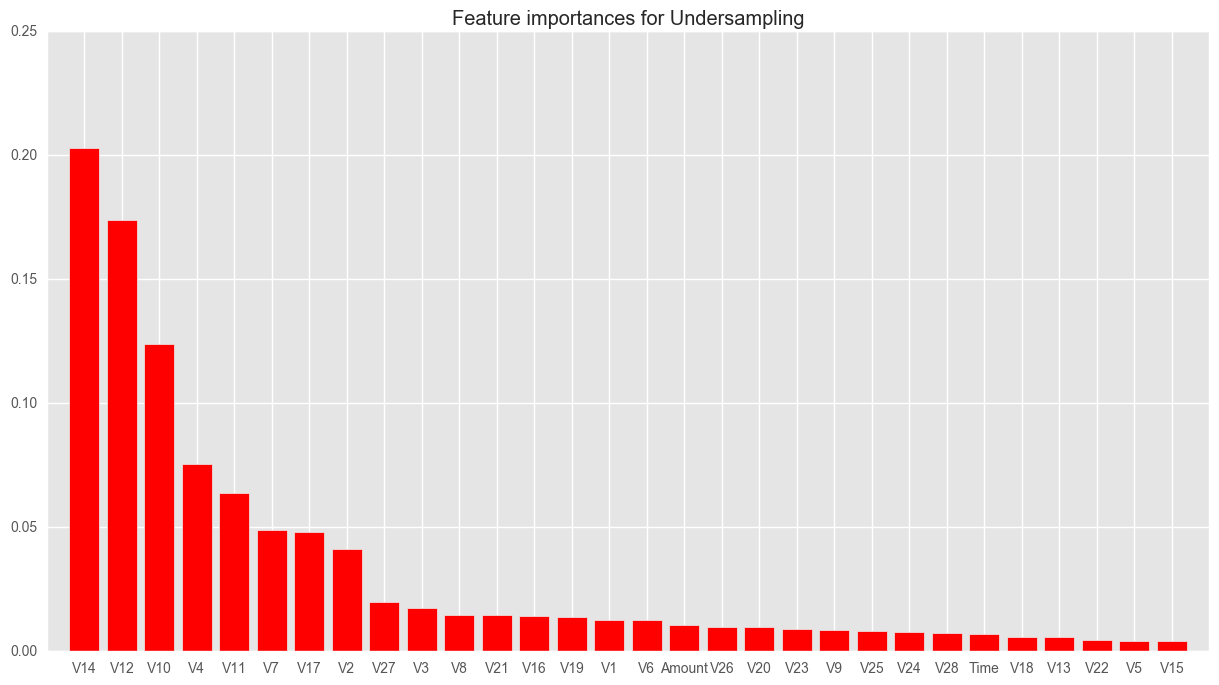

In [114]:
importances = un_rf.feature_importances_
# set the specific names
indices = np.argsort(importances)[::-1]
dic = dict(zip(feature_name, range(30)))
names = tuple([dic.keys()[dic.values().index(i)] for i in indices])


# Plot the feature importances of the forest
plt.style.use("ggplot")
plt.figure(figsize = (15, 8), dpi = 100)
plt.title("Feature importances for Undersampling")
plt.bar(range(data[feature_name].as_matrix().shape[1]), importances[indices],
       color = "r",  align = "center")
plt.xticks(range(data[feature_name].as_matrix().shape[1]), names)
plt.xlim([-1, data[feature_name].as_matrix().shape[1]])
plt.show()

We can observe that variables V14, V12, and V10, of which importances are all greater than 0.1, coincide with our previous conjecture in Exploratory Data Analysis. Also, the importances of V4, V11, V7, V17 and V2 are all around 0.5 which indicates that they are relatively important in this data. The rest of variables perform constant low importances. Therefore, V14, V12 and V10 are important for classifying whether a transaction is fraudulent, which is consist with the result in Exploratory Data Analysis.

## Voting Ensemble

Voting Ensemble is one of the simplest ways of combining the predictions from multiple machine learning algorithms.It works by first creating three models (Logistic regression, LinearSVC and Random Forest) from the training dataset. A Voting Classifier can then be used to wrap all these models and average the predictions of the sub-models when asked to make predictions for our testing set.

The accuracy of voting ensemble for testing dataset is 95.55%; and the true postive rate is 91.83%. The results of voting ensemble are really close to the results of the logistic classification.

Confusion matrix, without normalization

------------------------------------Classification Report------------------------------------
True positive rate is 0.918367346939
True negative rate is 0.953983774151


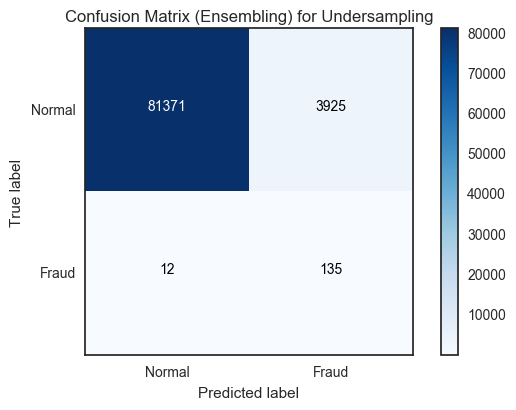

In [23]:
ensem_pred = eclf.fit(X_untrain, y_untrain).predict(X_test)
classification_report(y_test, ensem_pred, set_title = 'Confusion Matrix (Ensembling) for Undersampling')

In [21]:
print 'After combing all classifiers, the accuracy of Ensembling is {}'.format(accuracy_score(y_test, ensem_pred))

After combing all classifiers, the accuracy of Ensembling is 0.952365904755


## ROC Curve

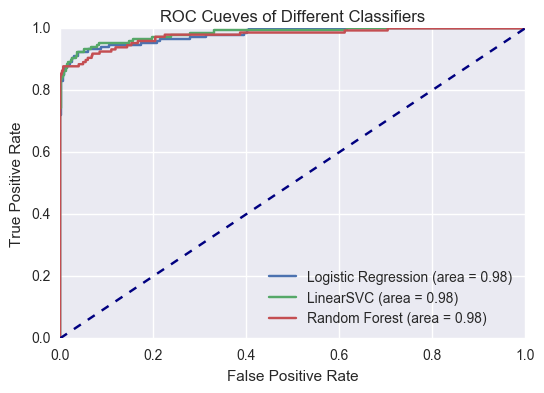

In [31]:
plt.plot(fpr_log, tpr_log, label = 'Logistic Regression (area = %0.2f)'%auc_log)
plt.plot(fpr_svc, tpr_svc, label = 'LinearSVC (area = %0.2f)'%auc_svc)
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest (area = %0.2f)'%auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Cueves of Different Classifiers')
plt.show()

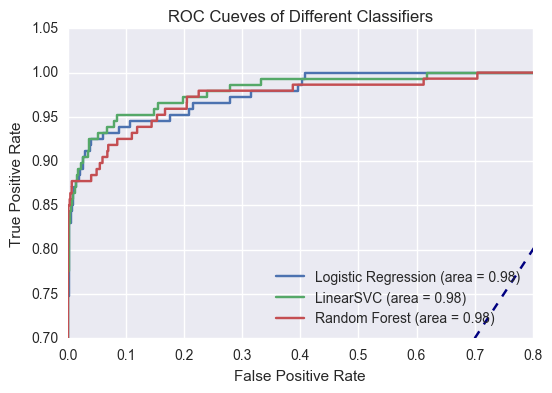

In [32]:
plt.plot(fpr_log, tpr_log, label = 'Logistic Regression (area = %0.2f)'%auc_log)
plt.plot(fpr_svc, tpr_svc, label = 'LinearSVC (area = %0.2f)'%auc_svc)
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest (area = %0.2f)'%auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 0.8])
plt.ylim([0.7, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Cueves of Different Classifiers')
plt.show()

<font size="3.5", face="arial"><p>ROC analysis provides tools to select possibly optimal models and to discard suboptimal ones independently from (and prior to specifying) the cost context or the class distribution. In a typical ROC curve, a line of random guess connecting diagonals is first drawn. Then, curves of various models are drawn. In our project, the true positive rate is the percentage of fraud transactions that are correctly identified as the true label. The false positive rate states what proportion of negatives are falsely predicted as positives. In this context, the false positive rate is the percentage of normal transactions that are incorrectly identified as the true label. False positive can be regarded as the cost of this model. This leads the criterion of selecting the best model: the model that is most close to the left upper corner.</p > 

<p>All models show very compelling results in regards to accuracy and have relatively high AUC values (0.98), indicating our models are good. </p ></font>

## Summary of Model Selection

| Model | Overall Accuracy | True Positive Rate        
| :- |-------------: | :-:
|Logistic Regression | 94.86%  | 92.52%
|LinearSVC | 93.47% | 93.20%
|Random Forest | 99.24%| 87.76%
|Voting Ensemble | 95.24% | 91.83%

From the table above, the Random Forest has the highest overall accuracy among models, but has lowest true positive rate (the percentage of predicting fraud given the true label is fraud transaction). In reality, the bank will prevent the fraud transaction, in order to avoid loss of money. Thus, we prefer to choose the Logistic Regression and LinearSVC to predict fraud transaction because they have the relative high overall accuracy and TPR.

# CONCLUSIONS

In this project, we approached the problem of exploring data and detecting fraud transaction in process of credit card. Based on exploratory data analysis, we provided a characterization of the transaction of labeled variables, bringing to the light many attributes useful to diﬀerentiate the fraud or normal. We leverage our characterization study towards a fraud detection mechanism. By constructing the different classification models, we were able to identify the fraud correctly and reduce the misclassification rate. We also investigate the tradeoff for the performance of classifications to ensure the high accuracy for real transaction. Therefore, we could see that all of our models did a good job in predicting the type of transaction and we believe our project results will help bank to detect potential fraud transaction and prevent huge financial losses.

# FUTURE DISCUSSION

Here are some possible directions that we are considering for the next step:

1. Build more models to predict the fraud
2. Apply the oversampling method to process the data 
3. Use more complicated ensembles like stacking